In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
Influenza = 'Influenza N1H1 2008_2010 America.csv'


# Read the mouse data and the study results
influenza_data= pd.read_csv(Influenza)
influenza_data.head(150)


,Country,WHOREGION,FLUREGION,Year,Week,SDATE,EDATE,SPEC_RECEIVED_NB,SPEC_PROCESSED_NB,AH1,AH1N12009,ALL_INF,ALL_INF2,TITLE
0,Argentina,Region of the Americas of WHO,Temperate South America,2008,1,12/31/2007,1/6/2008,NaN,19.0,0.0,NaN,0.0,19.0,No Activity
1,Argentina,Region of the Americas of WHO,Temperate South America,2008,2,1/7/2008,1/13/2008,NaN,21.0,0.0,NaN,0.0,21.0,No Activity
2,Argentina,Region of the Americas of WHO,Temperate South America,2008,3,1/14/2008,1/20/2008,NaN,27.0,0.0,NaN,0.0,27.0,No Activity
3,Argentina,Region of the Americas of WHO,Temperate South America,2008,4,1/21/2008,1/27/2008,NaN,25.0,0.0,NaN,0.0,25.0,No Activity
4,Argentina,Region of the Americas of WHO,Temperate South America,2008,5,1/28/2008,2/3/2008,NaN,26.0,0.0,NaN,0.0,26.0,No Activity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Argentina,Region of the Americas of WHO,Temperate South America,2010,41,10/11/2010,10/17/2010,NaN,1351.0,1.0,1.0,279.0,1072.0,Regional Outbreak
146,Argentina,Region of the Americas of WHO,Temperate South America,2010,42,10/18/2010,10/24/2010,NaN,1522.0,0.0,0.0,280.0,1242.0,Regional Outbreak
147,Argentina,Region of the Americas of WHO,Temperate South America,2010,43,10/25/2010,10/31/2010,NaN,988.0,0.0,0.0,89.0,899.0,Regional Outbreak
148,Argentina,Region of the Americas of WHO,Temperate South America,2010,44,11/1/2010,11/7/2010,NaN,857.0,0.0,0.0,59.0,798.0,Regional Outbreak


### Temperate South America

In [2]:
filt= (influenza_data["FLUREGION"]== "Temperate South America") 
temp_amer= influenza_data.loc[filt, :]
#Replace Nan values with 0 to make a better plot
temp_amer= temp_amer.fillna(0)
temp_amer

,Country,WHOREGION,FLUREGION,Year,Week,SDATE,EDATE,SPEC_RECEIVED_NB,SPEC_PROCESSED_NB,AH1,AH1N12009,ALL_INF,ALL_INF2,TITLE
0,Argentina,Region of the Americas of WHO,Temperate South America,2008,1,12/31/2007,1/6/2008,0.0,19.0,0.0,0.0,0.0,19.0,No Activity
1,Argentina,Region of the Americas of WHO,Temperate South America,2008,2,1/7/2008,1/13/2008,0.0,21.0,0.0,0.0,0.0,21.0,No Activity
2,Argentina,Region of the Americas of WHO,Temperate South America,2008,3,1/14/2008,1/20/2008,0.0,27.0,0.0,0.0,0.0,27.0,No Activity
3,Argentina,Region of the Americas of WHO,Temperate South America,2008,4,1/21/2008,1/27/2008,0.0,25.0,0.0,0.0,0.0,25.0,No Activity
4,Argentina,Region of the Americas of WHO,Temperate South America,2008,5,1/28/2008,2/3/2008,0.0,26.0,0.0,0.0,0.0,26.0,No Activity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2350,Uruguay,Region of the Americas of WHO,Temperate South America,2010,48,11/29/2010,12/5/2010,0.0,34.0,0.0,0.0,4.0,30.0,No Report
2351,Uruguay,Region of the Americas of WHO,Temperate South America,2010,49,12/6/2010,12/12/2010,0.0,25.0,0.0,0.0,2.0,23.0,No Report
2352,Uruguay,Region of the Americas of WHO,Temperate South America,2010,50,12/13/2010,12/19/2010,0.0,15.0,0.0,0.0,1.0,14.0,No Report
2353,Uruguay,Region of the Americas of WHO,Temperate South America,2010,51,12/20/2010,12/26/2010,0.0,21.0,0.0,0.0,1.0,20.0,No Report


In [3]:
# Get the number of countries in this region
temp_amer["Country"].value_counts()

Argentina    157
Paraguay     157
Chile        157
Uruguay      157
Name: Country, dtype: int64

In [4]:
print(temp_amer.count())

Country              628
WHOREGION            628
FLUREGION            628
Year                 628
Week                 628
SDATE                628
EDATE                628
SPEC_RECEIVED_NB     628
SPEC_PROCESSED_NB    628
AH1                  628
AH1N12009            628
ALL_INF              628
ALL_INF2             628
TITLE                628
dtype: int64


In [5]:
temp_title= pd.DataFrame(temp_amer["TITLE"].value_counts())
temp_title

,TITLE
No Report,274
No Activity,106
Sporadic,100
Regional Outbreak,94
Widespread Outbreak,39
Local Outbreak,15


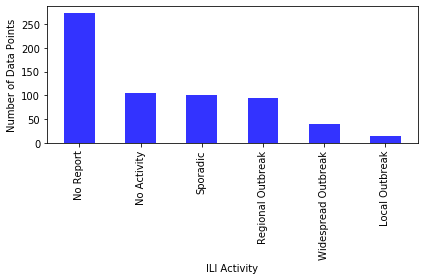

In [6]:
#Graphing with plt
x_axis = np.arange(len(temp_title))
tick_locations = [value for value in x_axis]  

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(6,4))
plt.xticks(tick_locations, temp_title.index.values, rotation="vertical")
plt.bar(x_axis, temp_title["TITLE"], color='b', alpha=0.8, align="center", width = .5)
# plt.xticks(tick_locations, drug_count, rotation="vertical")
plt.xlabel("ILI Activity")
plt.ylabel("Number of Data Points")
plt.tight_layout()

In [7]:
temp_ah1= temp_amer[["Country", "AH1"]].set_index("Country")

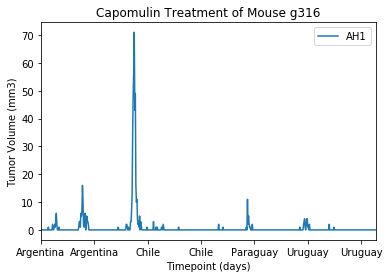

<Figure size 432x288 with 0 Axes>

In [8]:
# # Generate a line plot
# # Single Mouse has an ID of g316. Filter fot this Mouse ID along with the drug Capomulin
# filtered_cap = merge_data.loc[(merge_data["Drug Regimen"] == "Capomulin"), :]
# filtered_cap =filtered_cap.loc[(filtered_cap["Mouse ID"] == "g316"), :]
# filtered_cap= filtered_cap[["Timepoint","Tumor Volume (mm3)"]]
# filtered_cap= filtered_cap.set_index("Timepoint")
# Plot the graph
temp_ah1.plot(kind="line")
plt.title("Capomulin Treatment of Mouse g316")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.xticks(rotation=0)
plt.show()
plt.tight_layout()

### Tropical South America

In [9]:
trop_amer= influenza_data.loc[influenza_data["FLUREGION"]== "Tropical South America", :]
trop_amer

,Country,WHOREGION,FLUREGION,Year,Week,SDATE,EDATE,SPEC_RECEIVED_NB,SPEC_PROCESSED_NB,AH1,AH1N12009,ALL_INF,ALL_INF2,TITLE
157,Brazil,Region of the Americas of WHO,Tropical South America,2008,1,12/31/2007,1/6/2008,NaN,40.0,0.0,NaN,1.0,39.0,Sporadic
158,Brazil,Region of the Americas of WHO,Tropical South America,2008,2,1/7/2008,1/13/2008,NaN,30.0,0.0,NaN,0.0,30.0,No Activity
159,Brazil,Region of the Americas of WHO,Tropical South America,2008,3,1/14/2008,1/20/2008,NaN,31.0,0.0,NaN,0.0,31.0,Sporadic
160,Brazil,Region of the Americas of WHO,Tropical South America,2008,4,1/21/2008,1/27/2008,NaN,31.0,0.0,NaN,0.0,31.0,No Activity
161,Brazil,Region of the Americas of WHO,Tropical South America,2008,5,1/28/2008,2/3/2008,NaN,30.0,1.0,NaN,2.0,28.0,No Activity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2036,Peru,Region of the Americas of WHO,Tropical South America,2010,48,11/29/2010,12/5/2010,82.0,82.0,0.0,0.0,45.0,37.0,Sporadic
2037,Peru,Region of the Americas of WHO,Tropical South America,2010,49,12/6/2010,12/12/2010,85.0,85.0,0.0,0.0,27.0,58.0,Sporadic
2038,Peru,Region of the Americas of WHO,Tropical South America,2010,50,12/13/2010,12/19/2010,67.0,67.0,0.0,0.0,11.0,56.0,Sporadic
2039,Peru,Region of the Americas of WHO,Tropical South America,2010,51,12/20/2010,12/26/2010,51.0,51.0,0.0,0.0,8.0,43.0,No Report


In [10]:
trop_amer["Country"].value_counts()

Ecuador     157
Colombia    157
Peru        157
Brazil      157
Name: Country, dtype: int64

In [11]:
print(trop_amer.count())

Country              628
WHOREGION            628
FLUREGION            628
Year                 628
Week                 628
SDATE                628
EDATE                628
SPEC_RECEIVED_NB     157
SPEC_PROCESSED_NB    489
AH1                  376
AH1N12009            312
ALL_INF              507
ALL_INF2             481
TITLE                628
dtype: int64


In [12]:
trop_title= pd.DataFrame(trop_amer["TITLE"].value_counts())
trop_title

,TITLE
No Report,233
Sporadic,225
Regional Outbreak,67
No Activity,57
Local Outbreak,24
Widespread Outbreak,22


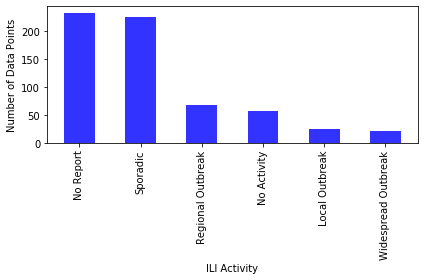

In [13]:
#Graphing with plt
x_axis = np.arange(len(trop_title))
tick_locations = [value for value in x_axis]  

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(6,4))
plt.xticks(tick_locations, trop_title.index.values, rotation="vertical")
plt.bar(x_axis, trop_title["TITLE"], color='b', alpha=0.8, align="center", width = .5)
# plt.xticks(tick_locations, drug_count, rotation="vertical")
plt.xlabel("ILI Activity")
plt.ylabel("Number of Data Points")
plt.tight_layout()

### Central America

In [14]:
central_amer= influenza_data.loc[influenza_data["FLUREGION"]== "Central America and Caribbean", :]
central_amer

,Country,WHOREGION,FLUREGION,Year,Week,SDATE,EDATE,SPEC_RECEIVED_NB,SPEC_PROCESSED_NB,AH1,AH1N12009,ALL_INF,ALL_INF2,TITLE
785,Costa Rica,Region of the Americas of WHO,Central America and Caribbean,2008,1,12/31/2007,1/6/2008,NaN,1.0,0.0,NaN,1.0,NaN,No Report
786,Costa Rica,Region of the Americas of WHO,Central America and Caribbean,2008,2,1/7/2008,1/13/2008,NaN,1.0,0.0,NaN,1.0,NaN,No Report
787,Costa Rica,Region of the Americas of WHO,Central America and Caribbean,2008,3,1/14/2008,1/20/2008,NaN,NaN,0.0,NaN,0.0,NaN,No Report
788,Costa Rica,Region of the Americas of WHO,Central America and Caribbean,2008,4,1/21/2008,1/27/2008,NaN,NaN,0.0,NaN,0.0,NaN,No Report
789,Costa Rica,Region of the Americas of WHO,Central America and Caribbean,2008,5,1/28/2008,2/3/2008,NaN,NaN,0.0,NaN,0.0,NaN,No Report
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722,Mexico,Region of the Americas of WHO,Central America and Caribbean,2010,48,11/29/2010,12/5/2010,NaN,614.0,0.0,0.0,268.0,346.0,Local Outbreak
1723,Mexico,Region of the Americas of WHO,Central America and Caribbean,2010,49,12/6/2010,12/12/2010,NaN,642.0,0.0,2.0,317.0,325.0,Local Outbreak
1724,Mexico,Region of the Americas of WHO,Central America and Caribbean,2010,50,12/13/2010,12/19/2010,NaN,612.0,0.0,3.0,274.0,338.0,Local Outbreak
1725,Mexico,Region of the Americas of WHO,Central America and Caribbean,2010,51,12/20/2010,12/26/2010,NaN,464.0,0.0,5.0,198.0,266.0,Local Outbreak


In [15]:
central_amer["Country"].value_counts()

Cuba           157
El Salvador    157
Honduras       157
Costa Rica     157
Mexico         157
Name: Country, dtype: int64

In [16]:
print(central_amer.count())

Country              785
WHOREGION            785
FLUREGION            785
Year                 785
Week                 785
SDATE                785
EDATE                785
SPEC_RECEIVED_NB     222
SPEC_PROCESSED_NB    654
AH1                  651
AH1N12009            462
ALL_INF              665
ALL_INF2             639
TITLE                785
dtype: int64


In [17]:
central_title= pd.DataFrame(central_amer["TITLE"].value_counts())
central_title

,TITLE
No Report,430
Sporadic,146
No Activity,68
Regional Outbreak,53
Local Outbreak,47
Widespread Outbreak,41


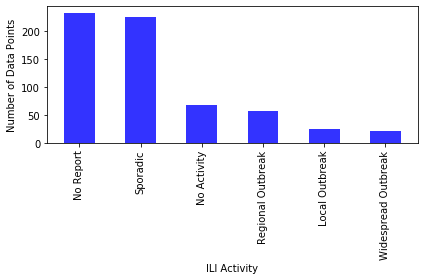

In [18]:
#Graphing with plt
x_axis = np.arange(len(central_title))
tick_locations = [value for value in x_axis]  

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(6,4))
plt.xticks(tick_locations, central_title.index.values, rotation="vertical")
plt.bar(x_axis, trop_title["TITLE"], color='b', alpha=0.8, align="center", width = .5)
# plt.xticks(tick_locations, drug_count, rotation="vertical")
plt.xlabel("ILI Activity")
plt.ylabel("Number of Data Points")
plt.tight_layout()

### North America

In [19]:
north_amer= influenza_data.loc[influenza_data["FLUREGION"]== "North America", :]
north_amer

,Country,WHOREGION,FLUREGION,Year,Week,SDATE,EDATE,SPEC_RECEIVED_NB,SPEC_PROCESSED_NB,AH1,AH1N12009,ALL_INF,ALL_INF2,TITLE
314,Canada,Region of the Americas of WHO,North America,2008,1,12/31/2007,1/6/2008,NaN,2770.0,NaN,NaN,292.0,NaN,No Report
315,Canada,Region of the Americas of WHO,North America,2008,2,1/7/2008,1/13/2008,NaN,4418.0,2.0,NaN,267.0,NaN,No Report
316,Canada,Region of the Americas of WHO,North America,2008,3,1/14/2008,1/20/2008,NaN,3801.0,1.0,NaN,300.0,NaN,No Report
317,Canada,Region of the Americas of WHO,North America,2008,4,1/21/2008,1/27/2008,NaN,3904.0,2.0,NaN,351.0,NaN,No Report
318,Canada,Region of the Americas of WHO,North America,2008,5,1/28/2008,2/3/2008,NaN,4135.0,NaN,NaN,508.0,NaN,No Report
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2193,United States of America,Region of the Americas of WHO,North America,2010,48,11/29/2010,12/5/2010,6187.0,6187.0,0.0,34.0,609.0,NaN,Sporadic
2194,United States of America,Region of the Americas of WHO,North America,2010,49,12/6/2010,12/12/2010,6341.0,6341.0,0.0,46.0,843.0,NaN,Sporadic
2195,United States of America,Region of the Americas of WHO,North America,2010,50,12/13/2010,12/19/2010,7564.0,7564.0,0.0,83.0,1438.0,NaN,Local Outbreak
2196,United States of America,Region of the Americas of WHO,North America,2010,51,12/20/2010,12/26/2010,8000.0,8000.0,0.0,98.0,1998.0,NaN,Local Outbreak


In [20]:
north_amer["Country"].value_counts()

United States of America    157
Canada                      157
Name: Country, dtype: int64

In [21]:
print(north_amer.count())

Country              314
WHOREGION            314
FLUREGION            314
Year                 314
Week                 314
SDATE                314
EDATE                314
SPEC_RECEIVED_NB     148
SPEC_PROCESSED_NB    307
AH1                  272
AH1N12009            189
ALL_INF              307
ALL_INF2               0
TITLE                314
dtype: int64


In [22]:
north_title= pd.DataFrame(north_amer["TITLE"].value_counts())
north_title

,TITLE
No Report,160
Sporadic,79
Local Outbreak,31
Widespread Outbreak,28
Regional Outbreak,14
No Activity,2


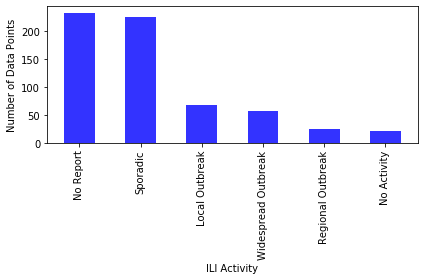

In [23]:
#Graphing with plt
x_axis = np.arange(len(north_title))
tick_locations = [value for value in x_axis]  

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(6,4))
plt.xticks(tick_locations, north_title.index.values, rotation="vertical")
plt.bar(x_axis, trop_title["TITLE"], color='b', alpha=0.8, align="center", width = .5)
# plt.xticks(tick_locations, drug_count, rotation="vertical")
plt.xlabel("ILI Activity")
plt.ylabel("Number of Data Points")
plt.tight_layout()